# 7:3 Train/Test Ratio


In [1]:
# 1. Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error, mean_squared_log_error
import numpy

In [2]:
# Read data file
data = pd.read_csv('VCB.csv')
df = data.reset_index()['Price']

In [3]:
# Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df).reshape(-1,1))

In [4]:
# Split train/test to train model
train_size = int(0.7 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:]

In [5]:
# Create Dataset
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [6]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 30
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [7]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [8]:
# 8. Define LSTM Model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(time_step, 1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [9]:
# 9. Fit model with train data
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100

27/27 [==============================] - 5s 66ms/step - loss: 0.0169 - val_loss: 0.0024
Epoch 2/100
27/27 [==============================] - 1s 26ms/step - loss: 0.0011 - val_loss: 0.0017
Epoch 3/100
27/27 [==============================] - 1s 27ms/step - loss: 6.2746e-04 - val_loss: 0.0016
Epoch 4/100
27/27 [==============================] - 1s 29ms/step - loss: 5.9080e-04 - val_loss: 0.0018
Epoch 5/100
27/27 [==============================] - 1s 34ms/step - loss: 5.8864e-04 - val_loss: 0.0018
Epoch 6/100
27/27 [==============================] - 1s 31ms/step - loss: 5.6550e-04 - val_loss: 0.0015
Epoch 7/100
27/27 [==============================] - 1s 28ms/step - loss: 5.5402e-04 - val_loss: 0.0016
Epoch 8/100
27/27 [==============================] - 1s 29ms/step - loss: 5.2600e-04 - val_loss: 0.0015
Epoch 9/100
27/27 [==============================] - 1s 29ms/step - loss: 5.4616e-04 - val_loss: 0.0013
Epoch 10/100
27/27 [==============================] - 1s 27ms/step - lo

27/27 [==============================] - 1s 24ms/step - loss: 1.3591e-04 - val_loss: 3.6666e-04
Epoch 76/100
27/27 [==============================] - 1s 24ms/step - loss: 1.3831e-04 - val_loss: 5.2527e-04
Epoch 77/100
27/27 [==============================] - 1s 24ms/step - loss: 1.1814e-04 - val_loss: 4.1795e-04
Epoch 78/100
27/27 [==============================] - 1s 25ms/step - loss: 1.2688e-04 - val_loss: 5.6758e-04
Epoch 79/100
27/27 [==============================] - 1s 24ms/step - loss: 1.2344e-04 - val_loss: 3.6941e-04
Epoch 80/100
27/27 [==============================] - 1s 26ms/step - loss: 1.3257e-04 - val_loss: 3.4261e-04
Epoch 81/100
27/27 [==============================] - 1s 24ms/step - loss: 1.6211e-04 - val_loss: 9.0319e-04
Epoch 82/100
27/27 [==============================] - 1s 27ms/step - loss: 1.5018e-04 - val_loss: 3.2860e-04
Epoch 83/100
27/27 [==============================] - 1s 27ms/step - loss: 1.2601e-04 - val_loss: 4.6945e-04
Epoch 84/100
27/27 [============

In [10]:
# Forecast test data
y_pred_lstm = model.predict(X_test)

y_pred_new_lstm = scaler.inverse_transform(y_pred_lstm.reshape(1, -1))
y_test_new_lstm = scaler.inverse_transform(np.array([y_test], dtype=np.float32))

23/23 [==============================] - 1s 6ms/step


In [12]:
# Chuẩn hóa dữ liệu y_pred_lstm
y_pred_lstm = scaler.inverse_transform(y_pred_lstm)

In [13]:
# Calculate RMSE,MAPE,MSLE 
test_score_rmse_lstm = np.sqrt(mean_squared_error(y_test_new_lstm, y_pred_new_lstm))
test_score_mape_lstm = mean_absolute_percentage_error(y_test_new_lstm, y_pred_new_lstm) * 100
test_score_msle_lstm = mean_squared_log_error(y_test_new_lstm, y_pred_new_lstm)

print('RMSE trên tập test là:', test_score_rmse_lstm)
print('MAPE trên tập test là:', test_score_mape_lstm)
print('MSLE trên tập test là:', test_score_msle_lstm)

RMSE trên tập test là: 2231.3245
MAPE trên tập test là: 2.196166291832924
MSLE trên tập test là: 0.00072492234


In [14]:
# 13. Forecast next 30 day
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=x_input.shape[1]
i=0
while(i<30):
    if(len(temp_input)>x_input.shape[1]):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

[0.7193895]
690
1 day input [0.65924831 0.65521802 0.65521802 0.67215146 0.67941014 0.71326661
 0.71246472 0.71246472 0.69714548 0.67699405 0.6882726  0.67699405
 0.68666882 0.67699405 0.66731929 0.68505462 0.7213376  0.7213376
 0.72939817 0.68585651 0.68908491 0.68908491 0.69714548 0.6898868
 0.70682024 0.69150099 0.67295335 0.68182623 0.68021203 0.67537986
 0.67134957 0.67215146 0.66489279 0.65360382 0.64957354 0.68908491
 0.67134957 0.67618175 0.69553128 0.70037387 0.68666882 0.69391708
 0.68585651 0.72698208 0.7455193  0.75116378 0.73665684 0.7213376
 0.69714548 0.71326661 0.71166283 0.7197234  0.71326661 0.7197234
 0.72939817 0.73101236 0.76568114 0.75036189 0.75842246 0.7753559
 0.78341647 0.79873572 0.79873572 0.81002468 0.82937421 0.82937421
 0.81727295 0.80679629 0.79389313 0.80518209 0.78583256 0.7761578
 0.75439218 0.72455558 0.71166283 0.71730731 0.71730731 0.67295335
 0.69875967 0.68908491 0.69956156 0.67295335 0.66489279 0.65683222
 0.67295335 0.68021203 0.68102434 0.6729

3 day output [[0.6909969]]
4 day input [0.67215146 0.67941014 0.71326661 0.71246472 0.71246472 0.69714548
 0.67699405 0.6882726  0.67699405 0.68666882 0.67699405 0.66731929
 0.68505462 0.7213376  0.7213376  0.72939817 0.68585651 0.68908491
 0.68908491 0.69714548 0.6898868  0.70682024 0.69150099 0.67295335
 0.68182623 0.68021203 0.67537986 0.67134957 0.67215146 0.66489279
 0.65360382 0.64957354 0.68908491 0.67134957 0.67618175 0.69553128
 0.70037387 0.68666882 0.69391708 0.68585651 0.72698208 0.7455193
 0.75116378 0.73665684 0.7213376  0.69714548 0.71326661 0.71166283
 0.7197234  0.71326661 0.7197234  0.72939817 0.73101236 0.76568114
 0.75036189 0.75842246 0.7753559  0.78341647 0.79873572 0.79873572
 0.81002468 0.82937421 0.82937421 0.81727295 0.80679629 0.79389313
 0.80518209 0.78583256 0.7761578  0.75439218 0.72455558 0.71166283
 0.71730731 0.71730731 0.67295335 0.69875967 0.68908491 0.69956156
 0.67295335 0.66489279 0.65683222 0.67295335 0.68021203 0.68102434
 0.67295335 0.68747071 0

6 day output [[0.6614988]]
7 day input [0.71246472 0.71246472 0.69714548 0.67699405 0.6882726  0.67699405
 0.68666882 0.67699405 0.66731929 0.68505462 0.7213376  0.7213376
 0.72939817 0.68585651 0.68908491 0.68908491 0.69714548 0.6898868
 0.70682024 0.69150099 0.67295335 0.68182623 0.68021203 0.67537986
 0.67134957 0.67215146 0.66489279 0.65360382 0.64957354 0.68908491
 0.67134957 0.67618175 0.69553128 0.70037387 0.68666882 0.69391708
 0.68585651 0.72698208 0.7455193  0.75116378 0.73665684 0.7213376
 0.69714548 0.71326661 0.71166283 0.7197234  0.71326661 0.7197234
 0.72939817 0.73101236 0.76568114 0.75036189 0.75842246 0.7753559
 0.78341647 0.79873572 0.79873572 0.81002468 0.82937421 0.82937421
 0.81727295 0.80679629 0.79389313 0.80518209 0.78583256 0.7761578
 0.75439218 0.72455558 0.71166283 0.71730731 0.71730731 0.67295335
 0.69875967 0.68908491 0.69956156 0.67295335 0.66489279 0.65683222
 0.67295335 0.68021203 0.68102434 0.67295335 0.68747071 0.68505462
 0.6923133  0.68182623 0.6834

9 day output [[0.6339954]]
10 day input [0.67699405 0.6882726  0.67699405 0.68666882 0.67699405 0.66731929
 0.68505462 0.7213376  0.7213376  0.72939817 0.68585651 0.68908491
 0.68908491 0.69714548 0.6898868  0.70682024 0.69150099 0.67295335
 0.68182623 0.68021203 0.67537986 0.67134957 0.67215146 0.66489279
 0.65360382 0.64957354 0.68908491 0.67134957 0.67618175 0.69553128
 0.70037387 0.68666882 0.69391708 0.68585651 0.72698208 0.7455193
 0.75116378 0.73665684 0.7213376  0.69714548 0.71326661 0.71166283
 0.7197234  0.71326661 0.7197234  0.72939817 0.73101236 0.76568114
 0.75036189 0.75842246 0.7753559  0.78341647 0.79873572 0.79873572
 0.81002468 0.82937421 0.82937421 0.81727295 0.80679629 0.79389313
 0.80518209 0.78583256 0.7761578  0.75439218 0.72455558 0.71166283
 0.71730731 0.71730731 0.67295335 0.69875967 0.68908491 0.69956156
 0.67295335 0.66489279 0.65683222 0.67295335 0.68021203 0.68102434
 0.67295335 0.68747071 0.68505462 0.6923133  0.68182623 0.68344043
 0.68908491 0.70117576 

12 day output [[0.60803646]]
13 day input [0.68666882 0.67699405 0.66731929 0.68505462 0.7213376  0.7213376
 0.72939817 0.68585651 0.68908491 0.68908491 0.69714548 0.6898868
 0.70682024 0.69150099 0.67295335 0.68182623 0.68021203 0.67537986
 0.67134957 0.67215146 0.66489279 0.65360382 0.64957354 0.68908491
 0.67134957 0.67618175 0.69553128 0.70037387 0.68666882 0.69391708
 0.68585651 0.72698208 0.7455193  0.75116378 0.73665684 0.7213376
 0.69714548 0.71326661 0.71166283 0.7197234  0.71326661 0.7197234
 0.72939817 0.73101236 0.76568114 0.75036189 0.75842246 0.7753559
 0.78341647 0.79873572 0.79873572 0.81002468 0.82937421 0.82937421
 0.81727295 0.80679629 0.79389313 0.80518209 0.78583256 0.7761578
 0.75439218 0.72455558 0.71166283 0.71730731 0.71730731 0.67295335
 0.69875967 0.68908491 0.69956156 0.67295335 0.66489279 0.65683222
 0.67295335 0.68021203 0.68102434 0.67295335 0.68747071 0.68505462
 0.6923133  0.68182623 0.68344043 0.68908491 0.70117576 0.69634358
 0.69391708 0.70198807 0.7

15 day output [[0.58312416]]
16 day input [0.68505462 0.7213376  0.7213376  0.72939817 0.68585651 0.68908491
 0.68908491 0.69714548 0.6898868  0.70682024 0.69150099 0.67295335
 0.68182623 0.68021203 0.67537986 0.67134957 0.67215146 0.66489279
 0.65360382 0.64957354 0.68908491 0.67134957 0.67618175 0.69553128
 0.70037387 0.68666882 0.69391708 0.68585651 0.72698208 0.7455193
 0.75116378 0.73665684 0.7213376  0.69714548 0.71326661 0.71166283
 0.7197234  0.71326661 0.7197234  0.72939817 0.73101236 0.76568114
 0.75036189 0.75842246 0.7753559  0.78341647 0.79873572 0.79873572
 0.81002468 0.82937421 0.82937421 0.81727295 0.80679629 0.79389313
 0.80518209 0.78583256 0.7761578  0.75439218 0.72455558 0.71166283
 0.71730731 0.71730731 0.67295335 0.69875967 0.68908491 0.69956156
 0.67295335 0.66489279 0.65683222 0.67295335 0.68021203 0.68102434
 0.67295335 0.68747071 0.68505462 0.6923133  0.68182623 0.68344043
 0.68908491 0.70117576 0.69634358 0.69391708 0.70198807 0.70520604
 0.70520604 0.7197234

17 day output [[0.56722987]]
18 day input [0.7213376  0.72939817 0.68585651 0.68908491 0.68908491 0.69714548
 0.6898868  0.70682024 0.69150099 0.67295335 0.68182623 0.68021203
 0.67537986 0.67134957 0.67215146 0.66489279 0.65360382 0.64957354
 0.68908491 0.67134957 0.67618175 0.69553128 0.70037387 0.68666882
 0.69391708 0.68585651 0.72698208 0.7455193  0.75116378 0.73665684
 0.7213376  0.69714548 0.71326661 0.71166283 0.7197234  0.71326661
 0.7197234  0.72939817 0.73101236 0.76568114 0.75036189 0.75842246
 0.7753559  0.78341647 0.79873572 0.79873572 0.81002468 0.82937421
 0.82937421 0.81727295 0.80679629 0.79389313 0.80518209 0.78583256
 0.7761578  0.75439218 0.72455558 0.71166283 0.71730731 0.71730731
 0.67295335 0.69875967 0.68908491 0.69956156 0.67295335 0.66489279
 0.65683222 0.67295335 0.68021203 0.68102434 0.67295335 0.68747071
 0.68505462 0.6923133  0.68182623 0.68344043 0.68908491 0.70117576
 0.69634358 0.69391708 0.70198807 0.70520604 0.70520604 0.7197234
 0.69794737 0.6753798

19 day output [[0.5521015]]
20 day input [0.68585651 0.68908491 0.68908491 0.69714548 0.6898868  0.70682024
 0.69150099 0.67295335 0.68182623 0.68021203 0.67537986 0.67134957
 0.67215146 0.66489279 0.65360382 0.64957354 0.68908491 0.67134957
 0.67618175 0.69553128 0.70037387 0.68666882 0.69391708 0.68585651
 0.72698208 0.7455193  0.75116378 0.73665684 0.7213376  0.69714548
 0.71326661 0.71166283 0.7197234  0.71326661 0.7197234  0.72939817
 0.73101236 0.76568114 0.75036189 0.75842246 0.7753559  0.78341647
 0.79873572 0.79873572 0.81002468 0.82937421 0.82937421 0.81727295
 0.80679629 0.79389313 0.80518209 0.78583256 0.7761578  0.75439218
 0.72455558 0.71166283 0.71730731 0.71730731 0.67295335 0.69875967
 0.68908491 0.69956156 0.67295335 0.66489279 0.65683222 0.67295335
 0.68021203 0.68102434 0.67295335 0.68747071 0.68505462 0.6923133
 0.68182623 0.68344043 0.68908491 0.70117576 0.69634358 0.69391708
 0.70198807 0.70520604 0.70520604 0.7197234  0.69794737 0.67537986
 0.67295335 0.67699405

22 day output [[0.5311288]]
23 day input [0.69714548 0.6898868  0.70682024 0.69150099 0.67295335 0.68182623
 0.68021203 0.67537986 0.67134957 0.67215146 0.66489279 0.65360382
 0.64957354 0.68908491 0.67134957 0.67618175 0.69553128 0.70037387
 0.68666882 0.69391708 0.68585651 0.72698208 0.7455193  0.75116378
 0.73665684 0.7213376  0.69714548 0.71326661 0.71166283 0.7197234
 0.71326661 0.7197234  0.72939817 0.73101236 0.76568114 0.75036189
 0.75842246 0.7753559  0.78341647 0.79873572 0.79873572 0.81002468
 0.82937421 0.82937421 0.81727295 0.80679629 0.79389313 0.80518209
 0.78583256 0.7761578  0.75439218 0.72455558 0.71166283 0.71730731
 0.71730731 0.67295335 0.69875967 0.68908491 0.69956156 0.67295335
 0.66489279 0.65683222 0.67295335 0.68021203 0.68102434 0.67295335
 0.68747071 0.68505462 0.6923133  0.68182623 0.68344043 0.68908491
 0.70117576 0.69634358 0.69391708 0.70198807 0.70520604 0.70520604
 0.7197234  0.69794737 0.67537986 0.67295335 0.67699405 0.67134957
 0.67941014 0.69150099

25 day output [[0.5123702]]
26 day input [0.69150099 0.67295335 0.68182623 0.68021203 0.67537986 0.67134957
 0.67215146 0.66489279 0.65360382 0.64957354 0.68908491 0.67134957
 0.67618175 0.69553128 0.70037387 0.68666882 0.69391708 0.68585651
 0.72698208 0.7455193  0.75116378 0.73665684 0.7213376  0.69714548
 0.71326661 0.71166283 0.7197234  0.71326661 0.7197234  0.72939817
 0.73101236 0.76568114 0.75036189 0.75842246 0.7753559  0.78341647
 0.79873572 0.79873572 0.81002468 0.82937421 0.82937421 0.81727295
 0.80679629 0.79389313 0.80518209 0.78583256 0.7761578  0.75439218
 0.72455558 0.71166283 0.71730731 0.71730731 0.67295335 0.69875967
 0.68908491 0.69956156 0.67295335 0.66489279 0.65683222 0.67295335
 0.68021203 0.68102434 0.67295335 0.68747071 0.68505462 0.6923133
 0.68182623 0.68344043 0.68908491 0.70117576 0.69634358 0.69391708
 0.70198807 0.70520604 0.70520604 0.7197234  0.69794737 0.67537986
 0.67295335 0.67699405 0.67134957 0.67941014 0.69150099 0.6923133
 0.6923133  0.69714548 

28 day output [[0.49574125]]
29 day input [0.68021203 0.67537986 0.67134957 0.67215146 0.66489279 0.65360382
 0.64957354 0.68908491 0.67134957 0.67618175 0.69553128 0.70037387
 0.68666882 0.69391708 0.68585651 0.72698208 0.7455193  0.75116378
 0.73665684 0.7213376  0.69714548 0.71326661 0.71166283 0.7197234
 0.71326661 0.7197234  0.72939817 0.73101236 0.76568114 0.75036189
 0.75842246 0.7753559  0.78341647 0.79873572 0.79873572 0.81002468
 0.82937421 0.82937421 0.81727295 0.80679629 0.79389313 0.80518209
 0.78583256 0.7761578  0.75439218 0.72455558 0.71166283 0.71730731
 0.71730731 0.67295335 0.69875967 0.68908491 0.69956156 0.67295335
 0.66489279 0.65683222 0.67295335 0.68021203 0.68102434 0.67295335
 0.68747071 0.68505462 0.6923133  0.68182623 0.68344043 0.68908491
 0.70117576 0.69634358 0.69391708 0.70198807 0.70520604 0.70520604
 0.7197234  0.69794737 0.67537986 0.67295335 0.67699405 0.67134957
 0.67941014 0.69150099 0.6923133  0.6923133  0.69714548 0.69714548
 0.69472939 0.6915009

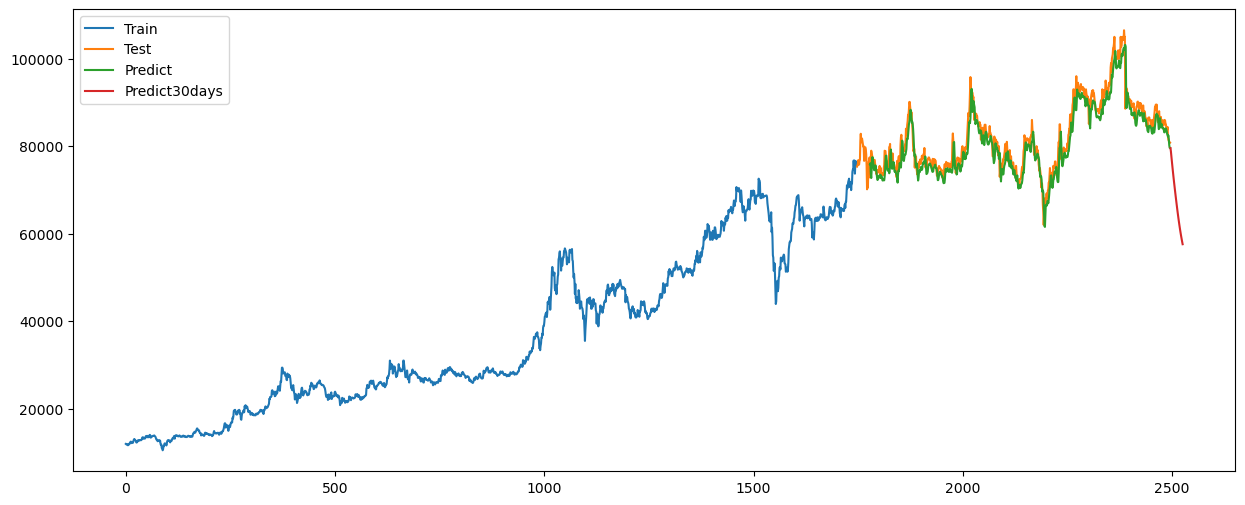

In [15]:
# Plot 
plt.figure(figsize=(15, 6))
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))

test_data_index = pd.RangeIndex(start=train_size+31, stop=train_size+test_size, step=1)
plt.plot(test_data_index,y_pred_lstm)

predict_data_index = pd.RangeIndex(start=len(df), stop=len(df)+30, step=1)
plt.plot(predict_data_index, scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Predict30days'])
plt.show()

# 8:2 Train/Test Ratio
    

In [16]:
# 1. Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error, mean_squared_log_error
import numpy

In [17]:
# Read data file
data = pd.read_csv('VCB.csv')
df = data.reset_index()['Price']
df

0       11929.0
1       11841.0
2       11797.0
3       11885.0
4       11797.0
         ...   
2491    81500.0
2492    81200.0
2493    81100.0
2494    80900.0
2495    80800.0
Name: Price, Length: 2496, dtype: float64

In [18]:
# Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df).reshape(-1,1))

In [19]:
# Split train/test to train model
train_size = int(0.8 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:]

In [20]:
# Create Dataset
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [21]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 30
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [22]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [23]:
# 8. Define LSTM Model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(time_step, 1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [24]:
# 9. Fit model with train data
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
31/31 [==============================] - 6s 62ms/step - loss: 0.0222 - val_loss: 0.0071
Epoch 2/100
31/31 [==============================] - 1s 24ms/step - loss: 0.0011 - val_loss: 0.0020
Epoch 3/100
31/31 [==============================] - 1s 23ms/step - loss: 7.3513e-04 - val_loss: 0.0026
Epoch 4/100
31/31 [==============================] - 1s 26ms/step - loss: 7.0350e-04 - val_loss: 0.0021
Epoch 5/100
31/31 [==============================] - 1s 30ms/step - loss: 6.9714e-04 - val_loss: 0.0019
Epoch 6/100
31/31 [==============================] - 1s 26ms/step - loss: 6.9793e-04 - val_loss: 0.0017
Epoch 7/100
31/31 [==============================] - 1s 24ms/step - loss: 7.4256e-04 - val_loss: 0.0027
Epoch 8/100
31/31 [==============================] - 1s 25ms/step - loss: 6.7936e-04 - val_loss: 0.0021
Epoch 9/100
31/31 [==============================] - 1s 25ms/step - loss: 6.5508e-04 - val_loss: 0.0025
Epoch 10/100
31/31 [==============================] - 1s 24ms/step - los

31/31 [==============================] - 1s 28ms/step - loss: 1.9977e-04 - val_loss: 5.2187e-04
Epoch 78/100
31/31 [==============================] - 1s 23ms/step - loss: 1.8260e-04 - val_loss: 5.1566e-04
Epoch 79/100
31/31 [==============================] - 1s 22ms/step - loss: 1.8623e-04 - val_loss: 4.6096e-04
Epoch 80/100
31/31 [==============================] - 1s 22ms/step - loss: 2.5056e-04 - val_loss: 4.2599e-04
Epoch 81/100
31/31 [==============================] - 1s 22ms/step - loss: 2.0943e-04 - val_loss: 5.3155e-04
Epoch 82/100
31/31 [==============================] - 1s 26ms/step - loss: 1.7291e-04 - val_loss: 5.6452e-04
Epoch 83/100
31/31 [==============================] - 1s 28ms/step - loss: 2.2055e-04 - val_loss: 4.0923e-04
Epoch 84/100
31/31 [==============================] - 1s 24ms/step - loss: 1.9230e-04 - val_loss: 3.5179e-04
Epoch 85/100
31/31 [==============================] - 1s 25ms/step - loss: 1.7063e-04 - val_loss: 3.6436e-04
Epoch 86/100
31/31 [============

In [25]:
# Forecast test data
y_pred_lstm = model.predict(X_test)

y_pred_new_lstm = scaler.inverse_transform(y_pred_lstm.reshape(1, -1))
y_test_new_lstm = scaler.inverse_transform(np.array([y_test], dtype=np.float32))

15/15 [==============================] - 1s 7ms/step


In [26]:
# Chuẩn hóa dữ liệu y_pred_lstm
y_pred_lstm = scaler.inverse_transform(y_pred_lstm)

In [27]:
# Calculate RMSE,MAPE,MSLE 
test_score_rmse_lstm = np.sqrt(mean_squared_error(y_test_new_lstm, y_pred_new_lstm))
test_score_mape_lstm = mean_absolute_percentage_error(y_test_new_lstm, y_pred_new_lstm) * 100
test_score_msle_lstm = mean_squared_log_error(y_test_new_lstm, y_pred_new_lstm)

print('RMSE trên tập test là:', test_score_rmse_lstm)
print('MAPE trên tập test là:', test_score_mape_lstm)
print('MSLE trên tập test là:', test_score_msle_lstm)

RMSE trên tập test là: 1896.005
MAPE trên tập test là: 1.6952669247984886
MSLE trên tập test là: 0.00051166874


In [28]:
# 13. Forecast next 30 day
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=x_input.shape[1]
i=0
while(i<30):
    if(len(temp_input)>x_input.shape[1]):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

[0.7465076]
441
1 day input [0.74901846 0.74381138 0.7448528  0.74589421 0.75318413 0.7511013
 0.75526697 0.77192964 0.75526697 0.75526697 0.74901846 0.74901846
 0.73443862 0.72610729 0.70007186 0.70007186 0.70736178 0.70736178
 0.74693563 0.74276996 0.72923154 0.73964571 0.73964571 0.73339721
 0.72298304 0.73443862 0.71777595 0.70215469 0.72402445 0.72402445
 0.69278194 0.65112525 0.66362226 0.68236777 0.67611926 0.68236777
 0.67507785 0.66570509 0.6782021  0.69278194 0.68965769 0.69694761
 0.70319611 0.71256886 0.72923154 0.71361028 0.69798902 0.7209002
 0.73443862 0.71569312 0.70111327 0.70007186 0.68653343 0.69278194
 0.68757485 0.7146517  0.68340918 0.68236777 0.70007186 0.68236777
 0.68132635 0.67195359 0.67091218 0.68549202 0.67716068 0.66987076
 0.66153942 0.66258084 0.66153942 0.64904242 0.67716068 0.66153942
 0.64071108 0.63966966 0.63862825 0.64487675 0.64383533 0.64071108
 0.63342116 0.64591817 0.64591817 0.64591817 0.65008383 0.66049801
 0.67195359 0.67507785 0.66882934 0.

3 day output [[0.77125216]]
4 day input [0.74589421 0.75318413 0.7511013  0.75526697 0.77192964 0.75526697
 0.75526697 0.74901846 0.74901846 0.73443862 0.72610729 0.70007186
 0.70007186 0.70736178 0.70736178 0.74693563 0.74276996 0.72923154
 0.73964571 0.73964571 0.73339721 0.72298304 0.73443862 0.71777595
 0.70215469 0.72402445 0.72402445 0.69278194 0.65112525 0.66362226
 0.68236777 0.67611926 0.68236777 0.67507785 0.66570509 0.6782021
 0.69278194 0.68965769 0.69694761 0.70319611 0.71256886 0.72923154
 0.71361028 0.69798902 0.7209002  0.73443862 0.71569312 0.70111327
 0.70007186 0.68653343 0.69278194 0.68757485 0.7146517  0.68340918
 0.68236777 0.70007186 0.68236777 0.68132635 0.67195359 0.67091218
 0.68549202 0.67716068 0.66987076 0.66153942 0.66258084 0.66153942
 0.64904242 0.67716068 0.66153942 0.64071108 0.63966966 0.63862825
 0.64487675 0.64383533 0.64071108 0.63342116 0.64591817 0.64591817
 0.64591817 0.65008383 0.66049801 0.67195359 0.67507785 0.66882934
 0.69278194 0.71256886 

6 day output [[0.79374045]]
7 day input [0.75526697 0.77192964 0.75526697 0.75526697 0.74901846 0.74901846
 0.73443862 0.72610729 0.70007186 0.70007186 0.70736178 0.70736178
 0.74693563 0.74276996 0.72923154 0.73964571 0.73964571 0.73339721
 0.72298304 0.73443862 0.71777595 0.70215469 0.72402445 0.72402445
 0.69278194 0.65112525 0.66362226 0.68236777 0.67611926 0.68236777
 0.67507785 0.66570509 0.6782021  0.69278194 0.68965769 0.69694761
 0.70319611 0.71256886 0.72923154 0.71361028 0.69798902 0.7209002
 0.73443862 0.71569312 0.70111327 0.70007186 0.68653343 0.69278194
 0.68757485 0.7146517  0.68340918 0.68236777 0.70007186 0.68236777
 0.68132635 0.67195359 0.67091218 0.68549202 0.67716068 0.66987076
 0.66153942 0.66258084 0.66153942 0.64904242 0.67716068 0.66153942
 0.64071108 0.63966966 0.63862825 0.64487675 0.64383533 0.64071108
 0.63342116 0.64591817 0.64591817 0.64591817 0.65008383 0.66049801
 0.67195359 0.67507785 0.66882934 0.69278194 0.71256886 0.71881737
 0.75005988 0.7448528  

10 day output [[0.8225004]]
11 day input [0.74901846 0.74901846 0.73443862 0.72610729 0.70007186 0.70007186
 0.70736178 0.70736178 0.74693563 0.74276996 0.72923154 0.73964571
 0.73964571 0.73339721 0.72298304 0.73443862 0.71777595 0.70215469
 0.72402445 0.72402445 0.69278194 0.65112525 0.66362226 0.68236777
 0.67611926 0.68236777 0.67507785 0.66570509 0.6782021  0.69278194
 0.68965769 0.69694761 0.70319611 0.71256886 0.72923154 0.71361028
 0.69798902 0.7209002  0.73443862 0.71569312 0.70111327 0.70007186
 0.68653343 0.69278194 0.68757485 0.7146517  0.68340918 0.68236777
 0.70007186 0.68236777 0.68132635 0.67195359 0.67091218 0.68549202
 0.67716068 0.66987076 0.66153942 0.66258084 0.66153942 0.64904242
 0.67716068 0.66153942 0.64071108 0.63966966 0.63862825 0.64487675
 0.64383533 0.64071108 0.63342116 0.64591817 0.64591817 0.64591817
 0.65008383 0.66049801 0.67195359 0.67507785 0.66882934 0.69278194
 0.71256886 0.71881737 0.75005988 0.7448528  0.7448528  0.73235579
 0.72923154 0.7396457

13 day output [[0.8439215]]
14 day input [0.72610729 0.70007186 0.70007186 0.70736178 0.70736178 0.74693563
 0.74276996 0.72923154 0.73964571 0.73964571 0.73339721 0.72298304
 0.73443862 0.71777595 0.70215469 0.72402445 0.72402445 0.69278194
 0.65112525 0.66362226 0.68236777 0.67611926 0.68236777 0.67507785
 0.66570509 0.6782021  0.69278194 0.68965769 0.69694761 0.70319611
 0.71256886 0.72923154 0.71361028 0.69798902 0.7209002  0.73443862
 0.71569312 0.70111327 0.70007186 0.68653343 0.69278194 0.68757485
 0.7146517  0.68340918 0.68236777 0.70007186 0.68236777 0.68132635
 0.67195359 0.67091218 0.68549202 0.67716068 0.66987076 0.66153942
 0.66258084 0.66153942 0.64904242 0.67716068 0.66153942 0.64071108
 0.63966966 0.63862825 0.64487675 0.64383533 0.64071108 0.63342116
 0.64591817 0.64591817 0.64591817 0.65008383 0.66049801 0.67195359
 0.67507785 0.66882934 0.69278194 0.71256886 0.71881737 0.75005988
 0.7448528  0.7448528  0.73235579 0.72923154 0.73964571 0.74068713
 0.74276996 0.7396457

16 day output [[0.862989]]
17 day input [0.70736178 0.70736178 0.74693563 0.74276996 0.72923154 0.73964571
 0.73964571 0.73339721 0.72298304 0.73443862 0.71777595 0.70215469
 0.72402445 0.72402445 0.69278194 0.65112525 0.66362226 0.68236777
 0.67611926 0.68236777 0.67507785 0.66570509 0.6782021  0.69278194
 0.68965769 0.69694761 0.70319611 0.71256886 0.72923154 0.71361028
 0.69798902 0.7209002  0.73443862 0.71569312 0.70111327 0.70007186
 0.68653343 0.69278194 0.68757485 0.7146517  0.68340918 0.68236777
 0.70007186 0.68236777 0.68132635 0.67195359 0.67091218 0.68549202
 0.67716068 0.66987076 0.66153942 0.66258084 0.66153942 0.64904242
 0.67716068 0.66153942 0.64071108 0.63966966 0.63862825 0.64487675
 0.64383533 0.64071108 0.63342116 0.64591817 0.64591817 0.64591817
 0.65008383 0.66049801 0.67195359 0.67507785 0.66882934 0.69278194
 0.71256886 0.71881737 0.75005988 0.7448528  0.7448528  0.73235579
 0.72923154 0.73964571 0.74068713 0.74276996 0.73964571 0.73964571
 0.73964571 0.73339721

19 day output [[0.87948346]]
20 day input [0.74276996 0.72923154 0.73964571 0.73964571 0.73339721 0.72298304
 0.73443862 0.71777595 0.70215469 0.72402445 0.72402445 0.69278194
 0.65112525 0.66362226 0.68236777 0.67611926 0.68236777 0.67507785
 0.66570509 0.6782021  0.69278194 0.68965769 0.69694761 0.70319611
 0.71256886 0.72923154 0.71361028 0.69798902 0.7209002  0.73443862
 0.71569312 0.70111327 0.70007186 0.68653343 0.69278194 0.68757485
 0.7146517  0.68340918 0.68236777 0.70007186 0.68236777 0.68132635
 0.67195359 0.67091218 0.68549202 0.67716068 0.66987076 0.66153942
 0.66258084 0.66153942 0.64904242 0.67716068 0.66153942 0.64071108
 0.63966966 0.63862825 0.64487675 0.64383533 0.64071108 0.63342116
 0.64591817 0.64591817 0.64591817 0.65008383 0.66049801 0.67195359
 0.67507785 0.66882934 0.69278194 0.71256886 0.71881737 0.75005988
 0.7448528  0.7448528  0.73235579 0.72923154 0.73964571 0.74068713
 0.74276996 0.73964571 0.73964571 0.73964571 0.73339721 0.72402445
 0.72610729 0.744852

22 day output [[0.89384675]]
23 day input [0.73964571 0.73339721 0.72298304 0.73443862 0.71777595 0.70215469
 0.72402445 0.72402445 0.69278194 0.65112525 0.66362226 0.68236777
 0.67611926 0.68236777 0.67507785 0.66570509 0.6782021  0.69278194
 0.68965769 0.69694761 0.70319611 0.71256886 0.72923154 0.71361028
 0.69798902 0.7209002  0.73443862 0.71569312 0.70111327 0.70007186
 0.68653343 0.69278194 0.68757485 0.7146517  0.68340918 0.68236777
 0.70007186 0.68236777 0.68132635 0.67195359 0.67091218 0.68549202
 0.67716068 0.66987076 0.66153942 0.66258084 0.66153942 0.64904242
 0.67716068 0.66153942 0.64071108 0.63966966 0.63862825 0.64487675
 0.64383533 0.64071108 0.63342116 0.64591817 0.64591817 0.64591817
 0.65008383 0.66049801 0.67195359 0.67507785 0.66882934 0.69278194
 0.71256886 0.71881737 0.75005988 0.7448528  0.7448528  0.73235579
 0.72923154 0.73964571 0.74068713 0.74276996 0.73964571 0.73964571
 0.73964571 0.73339721 0.72402445 0.72610729 0.7448528  0.7448528
 0.75005988 0.7500598

26 day output [[0.9102596]]
27 day input [0.71777595 0.70215469 0.72402445 0.72402445 0.69278194 0.65112525
 0.66362226 0.68236777 0.67611926 0.68236777 0.67507785 0.66570509
 0.6782021  0.69278194 0.68965769 0.69694761 0.70319611 0.71256886
 0.72923154 0.71361028 0.69798902 0.7209002  0.73443862 0.71569312
 0.70111327 0.70007186 0.68653343 0.69278194 0.68757485 0.7146517
 0.68340918 0.68236777 0.70007186 0.68236777 0.68132635 0.67195359
 0.67091218 0.68549202 0.67716068 0.66987076 0.66153942 0.66258084
 0.66153942 0.64904242 0.67716068 0.66153942 0.64071108 0.63966966
 0.63862825 0.64487675 0.64383533 0.64071108 0.63342116 0.64591817
 0.64591817 0.64591817 0.65008383 0.66049801 0.67195359 0.67507785
 0.66882934 0.69278194 0.71256886 0.71881737 0.75005988 0.7448528
 0.7448528  0.73235579 0.72923154 0.73964571 0.74068713 0.74276996
 0.73964571 0.73964571 0.73964571 0.73339721 0.72402445 0.72610729
 0.7448528  0.7448528  0.75005988 0.75005988 0.78650948 0.76568114
 0.7511013  0.75214272 

29 day output [[0.9208877]]


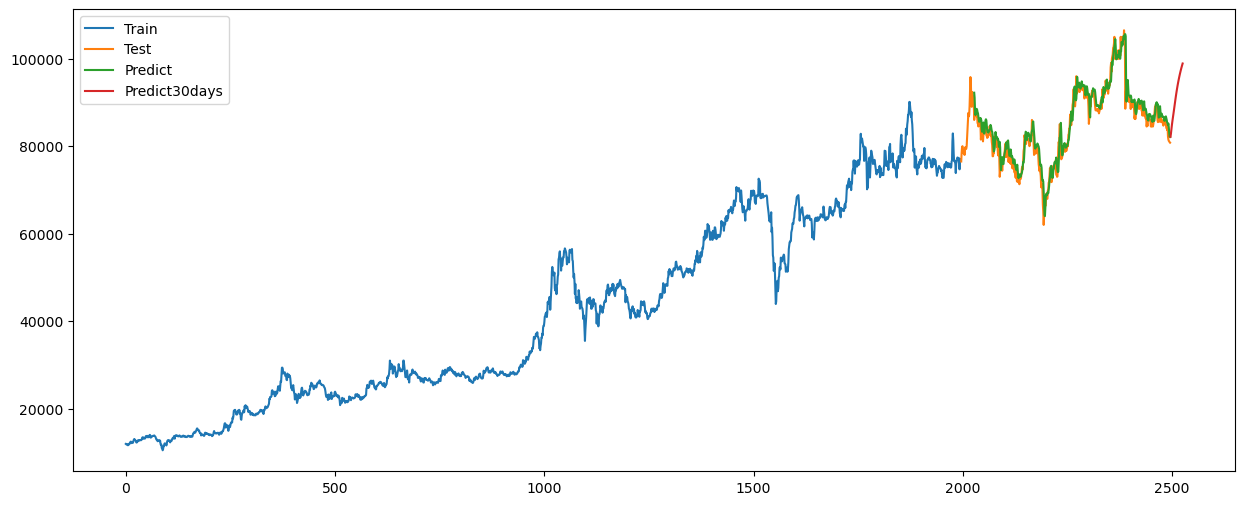

In [29]:
# Plot 
plt.figure(figsize=(15, 6))
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))

test_data_index = pd.RangeIndex(start=train_size+31, stop=train_size+test_size, step=1)
plt.plot(test_data_index,y_pred_lstm)

predict_data_index = pd.RangeIndex(start=len(df), stop=len(df)+30, step=1)
plt.plot(predict_data_index, scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Predict30days'])
plt.show()

# 9:1 Train/Test Ratio

In [30]:
# 1. Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error, mean_squared_log_error
import numpy

In [31]:
# Read data file
data = pd.read_csv('VCB.csv')
df = data.reset_index()['Price']
df

0       11929.0
1       11841.0
2       11797.0
3       11885.0
4       11797.0
         ...   
2491    81500.0
2492    81200.0
2493    81100.0
2494    80900.0
2495    80800.0
Name: Price, Length: 2496, dtype: float64

In [32]:
# Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df).reshape(-1,1))

In [33]:
# Split train/test to train model
train_size = int(0.9 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:]

In [34]:
# Create Dataset
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [35]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 30
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [36]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [37]:
# 8. Define LSTM Model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(time_step, 1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [38]:
# 9. Fit model with train data
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
35/35 [==============================] - 5s 47ms/step - loss: 0.0186 - val_loss: 0.0034
Epoch 2/100
35/35 [==============================] - 1s 24ms/step - loss: 0.0010 - val_loss: 0.0019
Epoch 3/100
35/35 [==============================] - 1s 24ms/step - loss: 8.8028e-04 - val_loss: 0.0023
Epoch 4/100
35/35 [==============================] - 1s 24ms/step - loss: 8.9335e-04 - val_loss: 0.0017
Epoch 5/100
35/35 [==============================] - 1s 25ms/step - loss: 8.4747e-04 - val_loss: 0.0014
Epoch 6/100
35/35 [==============================] - 1s 23ms/step - loss: 8.5169e-04 - val_loss: 0.0016
Epoch 7/100
35/35 [==============================] - 1s 23ms/step - loss: 8.3347e-04 - val_loss: 0.0028
Epoch 8/100
35/35 [==============================] - 1s 28ms/step - loss: 8.0106e-04 - val_loss: 0.0013
Epoch 9/100
35/35 [==============================] - 1s 23ms/step - loss: 7.6439e-04 - val_loss: 0.0015
Epoch 10/100
35/35 [==============================] - 1s 26ms/step - los

35/35 [==============================] - 1s 27ms/step - loss: 1.5502e-04 - val_loss: 8.9813e-04
Epoch 78/100
35/35 [==============================] - 1s 23ms/step - loss: 2.1436e-04 - val_loss: 0.0013
Epoch 79/100
35/35 [==============================] - 1s 26ms/step - loss: 1.6741e-04 - val_loss: 2.8402e-04
Epoch 80/100
35/35 [==============================] - 1s 22ms/step - loss: 1.5938e-04 - val_loss: 3.1536e-04
Epoch 81/100
35/35 [==============================] - 1s 23ms/step - loss: 1.4737e-04 - val_loss: 4.7226e-04
Epoch 82/100
35/35 [==============================] - 1s 24ms/step - loss: 1.5695e-04 - val_loss: 4.2754e-04
Epoch 83/100
35/35 [==============================] - 1s 25ms/step - loss: 1.4079e-04 - val_loss: 3.0652e-04
Epoch 84/100
35/35 [==============================] - 1s 25ms/step - loss: 1.4708e-04 - val_loss: 3.3467e-04
Epoch 85/100
35/35 [==============================] - 1s 25ms/step - loss: 1.3671e-04 - val_loss: 4.6617e-04
Epoch 86/100
35/35 [================

In [39]:
# Forecast test data
y_pred_lstm = model.predict(X_test)

y_pred_new_lstm = scaler.inverse_transform(y_pred_lstm.reshape(1, -1))
y_test_new_lstm = scaler.inverse_transform(np.array([y_test], dtype=np.float32))

7/7 [==============================] - 1s 5ms/step


In [40]:
# Chuẩn hóa dữ liệu y_pred_lstm
y_pred_lstm = scaler.inverse_transform(y_pred_lstm)

In [41]:
# Calculate RMSE,MAPE,MSLE 
test_score_rmse_lstm = np.sqrt(mean_squared_error(y_test_new_lstm, y_pred_new_lstm))
test_score_mape_lstm = mean_absolute_percentage_error(y_test_new_lstm, y_pred_new_lstm) * 100
test_score_msle_lstm = mean_squared_log_error(y_test_new_lstm, y_pred_new_lstm)

print('RMSE trên tập test là:', test_score_rmse_lstm)
print('MAPE trên tập test là:', test_score_mape_lstm)
print('MSLE trên tập test là:', test_score_msle_lstm)

RMSE trên tập test là: 1966.8995
MAPE trên tập test là: 1.5166926197707653
MSLE trên tập test là: 0.00044388062


In [42]:
# 13. Forecast next 30 day
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=x_input.shape[1]
i=0
while(i<30):
    if(len(temp_input)>x_input.shape[1]):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


[0.728722]
191
1 day input [0.84691168 0.85211876 0.85628443 0.84274601 0.85732585 0.84899451
 0.85003593 0.84066317 0.82816617 0.817752   0.80942066 0.81046208
 0.80942066 0.81150349 0.81150349 0.80733783 0.81254491 0.81046208
 0.80213074 0.80629641 0.81046208 0.82191767 0.82816617 0.83337325
 0.81254491 0.82608333 0.85940868 0.85211876 0.84899451 0.83858034
 0.85732585 0.84587026 0.85524301 0.85732585 0.88023703 0.87190569
 0.8604501  0.85732585 0.85524301 0.86149152 0.84899451 0.8604501
 0.87502994 0.86982285 0.86878144 0.87919561 0.91147954 0.92189371
 0.90106537 0.93230788 0.93751497 0.94272206 0.95834331 0.95938473
 0.96875749 0.98437874 0.95001198 0.93126647 0.93230788 0.93647355
 0.93126647 0.93230788 0.93230788 0.94376347 0.95209481 0.93230788
 0.93230788 0.93230788 0.95313623 0.9395978  0.98437874 0.96042615
 0.9635504  0.97396457 0.98333733 0.98437874 0.98229591 0.97708882
 1.         0.98437874 0.98437874 0.81326349 0.84587026 0.86357435
 0.85628443 0.85940868 0.84482884 0.

6 day output [[0.705841]]
7 day input [0.85003593 0.84066317 0.82816617 0.817752   0.80942066 0.81046208
 0.80942066 0.81150349 0.81150349 0.80733783 0.81254491 0.81046208
 0.80213074 0.80629641 0.81046208 0.82191767 0.82816617 0.83337325
 0.81254491 0.82608333 0.85940868 0.85211876 0.84899451 0.83858034
 0.85732585 0.84587026 0.85524301 0.85732585 0.88023703 0.87190569
 0.8604501  0.85732585 0.85524301 0.86149152 0.84899451 0.8604501
 0.87502994 0.86982285 0.86878144 0.87919561 0.91147954 0.92189371
 0.90106537 0.93230788 0.93751497 0.94272206 0.95834331 0.95938473
 0.96875749 0.98437874 0.95001198 0.93126647 0.93230788 0.93647355
 0.93126647 0.93230788 0.93230788 0.94376347 0.95209481 0.93230788
 0.93230788 0.93230788 0.95313623 0.9395978  0.98437874 0.96042615
 0.9635504  0.97396457 0.98333733 0.98437874 0.98229591 0.97708882
 1.         0.98437874 0.98437874 0.81326349 0.84587026 0.86357435
 0.85628443 0.85940868 0.84482884 0.84066317 0.84378743 0.83441467
 0.82920759 0.83649751 0.

13 day output [[0.6879217]]
14 day input [0.81150349 0.81150349 0.80733783 0.81254491 0.81046208 0.80213074
 0.80629641 0.81046208 0.82191767 0.82816617 0.83337325 0.81254491
 0.82608333 0.85940868 0.85211876 0.84899451 0.83858034 0.85732585
 0.84587026 0.85524301 0.85732585 0.88023703 0.87190569 0.8604501
 0.85732585 0.85524301 0.86149152 0.84899451 0.8604501  0.87502994
 0.86982285 0.86878144 0.87919561 0.91147954 0.92189371 0.90106537
 0.93230788 0.93751497 0.94272206 0.95834331 0.95938473 0.96875749
 0.98437874 0.95001198 0.93126647 0.93230788 0.93647355 0.93126647
 0.93230788 0.93230788 0.94376347 0.95209481 0.93230788 0.93230788
 0.93230788 0.95313623 0.9395978  0.98437874 0.96042615 0.9635504
 0.97396457 0.98333733 0.98437874 0.98229591 0.97708882 1.
 0.98437874 0.98437874 0.81326349 0.84587026 0.86357435 0.85628443
 0.85940868 0.84482884 0.84066317 0.84378743 0.83441467 0.82920759
 0.83649751 0.83545609 0.830249   0.81254491 0.83233184 0.817752
 0.81671058 0.81983483 0.82191767

17 day output [[0.67967325]]
18 day input [0.81046208 0.80213074 0.80629641 0.81046208 0.82191767 0.82816617
 0.83337325 0.81254491 0.82608333 0.85940868 0.85211876 0.84899451
 0.83858034 0.85732585 0.84587026 0.85524301 0.85732585 0.88023703
 0.87190569 0.8604501  0.85732585 0.85524301 0.86149152 0.84899451
 0.8604501  0.87502994 0.86982285 0.86878144 0.87919561 0.91147954
 0.92189371 0.90106537 0.93230788 0.93751497 0.94272206 0.95834331
 0.95938473 0.96875749 0.98437874 0.95001198 0.93126647 0.93230788
 0.93647355 0.93126647 0.93230788 0.93230788 0.94376347 0.95209481
 0.93230788 0.93230788 0.93230788 0.95313623 0.9395978  0.98437874
 0.96042615 0.9635504  0.97396457 0.98333733 0.98437874 0.98229591
 0.97708882 1.         0.98437874 0.98437874 0.81326349 0.84587026
 0.86357435 0.85628443 0.85940868 0.84482884 0.84066317 0.84378743
 0.83441467 0.82920759 0.83649751 0.83545609 0.830249   0.81254491
 0.83233184 0.817752   0.81671058 0.81983483 0.82191767 0.82295908
 0.82608333 0.811503

21 day output [[0.67258674]]
22 day input [0.82191767 0.82816617 0.83337325 0.81254491 0.82608333 0.85940868
 0.85211876 0.84899451 0.83858034 0.85732585 0.84587026 0.85524301
 0.85732585 0.88023703 0.87190569 0.8604501  0.85732585 0.85524301
 0.86149152 0.84899451 0.8604501  0.87502994 0.86982285 0.86878144
 0.87919561 0.91147954 0.92189371 0.90106537 0.93230788 0.93751497
 0.94272206 0.95834331 0.95938473 0.96875749 0.98437874 0.95001198
 0.93126647 0.93230788 0.93647355 0.93126647 0.93230788 0.93230788
 0.94376347 0.95209481 0.93230788 0.93230788 0.93230788 0.95313623
 0.9395978  0.98437874 0.96042615 0.9635504  0.97396457 0.98333733
 0.98437874 0.98229591 0.97708882 1.         0.98437874 0.98437874
 0.81326349 0.84587026 0.86357435 0.85628443 0.85940868 0.84482884
 0.84066317 0.84378743 0.83441467 0.82920759 0.83649751 0.83545609
 0.830249   0.81254491 0.83233184 0.817752   0.81671058 0.81983483
 0.82191767 0.82295908 0.82608333 0.81150349 0.78963373 0.79692365
 0.78859232 0.796923

27 day output [[0.66322047]]
28 day input [0.85211876 0.84899451 0.83858034 0.85732585 0.84587026 0.85524301
 0.85732585 0.88023703 0.87190569 0.8604501  0.85732585 0.85524301
 0.86149152 0.84899451 0.8604501  0.87502994 0.86982285 0.86878144
 0.87919561 0.91147954 0.92189371 0.90106537 0.93230788 0.93751497
 0.94272206 0.95834331 0.95938473 0.96875749 0.98437874 0.95001198
 0.93126647 0.93230788 0.93647355 0.93126647 0.93230788 0.93230788
 0.94376347 0.95209481 0.93230788 0.93230788 0.93230788 0.95313623
 0.9395978  0.98437874 0.96042615 0.9635504  0.97396457 0.98333733
 0.98437874 0.98229591 0.97708882 1.         0.98437874 0.98437874
 0.81326349 0.84587026 0.86357435 0.85628443 0.85940868 0.84482884
 0.84066317 0.84378743 0.83441467 0.82920759 0.83649751 0.83545609
 0.830249   0.81254491 0.83233184 0.817752   0.81671058 0.81983483
 0.82191767 0.82295908 0.82608333 0.81150349 0.78963373 0.79692365
 0.78859232 0.79692365 0.81150349 0.81879341 0.81879341 0.82920759
 0.830249   0.822959

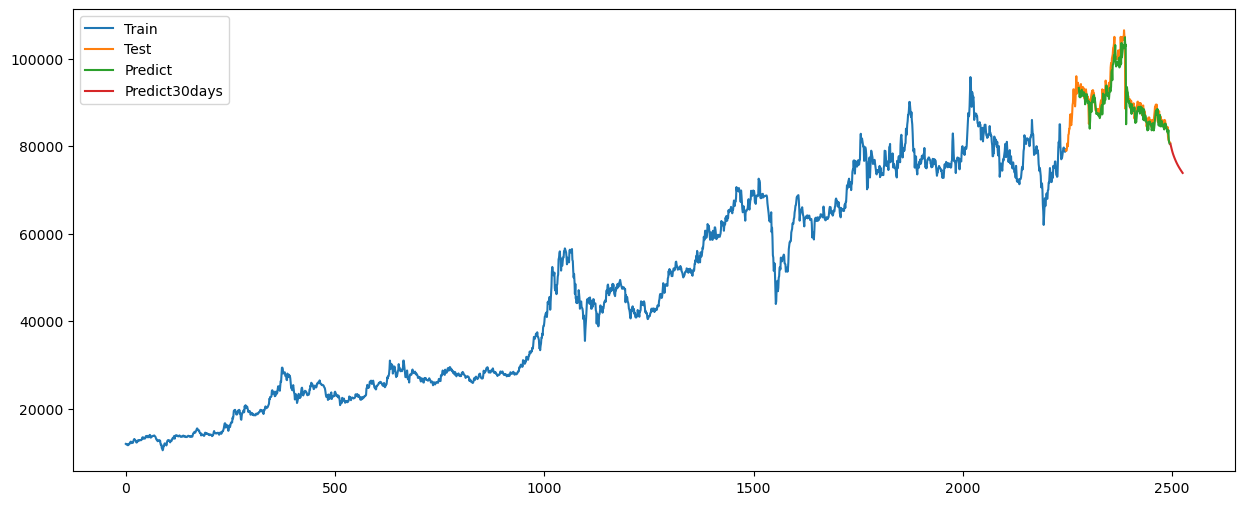

In [43]:
# Plot 
plt.figure(figsize=(15, 6))
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(train_data_index, scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))

test_data_index = pd.RangeIndex(start=train_size+31, stop=train_size+test_size, step=1)
plt.plot(test_data_index,y_pred_lstm)

predict_data_index = pd.RangeIndex(start=len(df), stop=len(df)+30, step=1)
plt.plot(predict_data_index, scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Predict30days'])
plt.show()